In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.io import read_image
import torch
from torchvision.transforms import ToTensor

In [27]:
pil_to_tensor = ToTensor()

im = Image.open('./data/train/000000_0.jpg')
t = pil_to_tensor(im)
t.shape

torch.Size([3, 56, 56])

In [22]:
im = read_image('./data/train/000000_0.jpg')
im.shape

torch.Size([3, 56, 56])

In [14]:
# Labeling balance
labels = []
for f in os.listdir('./data/train'):
    labels.append(int(os.path.splitext(f)[0].split('_')[1]))

In [16]:
print('with mask', sum(labels))
print('without mask', len(labels) - sum(labels))

with mask 9948
without mask 8311


(array([8311.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9948.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

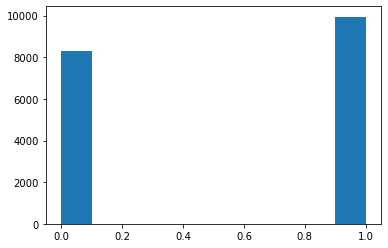

In [15]:
plt.hist(labels)

In [ ]:
images_dir = './data/train'
images = []
for i in os.listdir(images_dir):
    im = Image.open(os.path.join(images_dir, i))
    images.append((im.width, im.height))
len(images)

In [ ]:
x = [dim[0] for dim in images]
plt.hist(x, bins=30)
plt.title('Image width histogram')
plt.show()

In [ ]:
y = [dim[1] for dim in images]
plt.hist(y, bins=30)
plt.title('Image height histogram')
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.title('Image width-height scatter')
plt.xlabel('Image width')
plt.ylabel('Image height')
plt.show()

In [ ]:
sum(y) / len(y)

In [ ]:
im = Image.open(os.path.join(images_dir, os.listdir(images_dir)[32]))
print(im.width, im.height)
im

In [ ]:
im.resize((256,256), Image.NEAREST)

In [ ]:
im.resize((256,256), Image.BILINEAR)

In [ ]:
im.resize((256,256), Image.ANTIALIAS)

In [ ]:
im.resize((256,256), Image.BILINEAR).rotate(90)

In [ ]:
import numpy as np

x = np.asanyarray(im)
x

In [ ]:
i1 = im.resize((256,256), Image.BILINEAR)
i1

In [ ]:
x = np.asanyarray(i1)
_x = x + np.random.standard_normal(x.shape) * 3
i2 = Image.fromarray(np.uint8(_x))
i2

In [ ]:
# swapping color channels
d1,d2,d3 = x[:,:,0], x[:,:,1], x[:,:,2]
Image.fromarray(np.stack([d2,d1,d3]).astype(np.uint8).swapaxes(0,1).swapaxes(1,2))

In [ ]:
import torch
import torchvision

im = torchvision.utils.Image.open(os.path.join(images_dir, os.listdir(images_dir)[32]))
im

In [ ]:
transform = torchvision.transforms.ToTensor()
transform(im).shape

In [ ]:
import os
from PIL import Image

train_images_dir = './data/train'

for i in os.listdir(train_images_dir):
    im = Image.open(os.path.join(train_images_dir, i))
    im = im.resize((256,256), Image.BILINEAR)
    im.save(os.path.join('./data/train256', i))

torch.Size([3, 224, 224]) 0


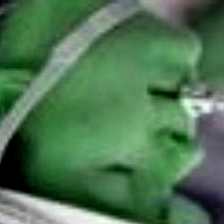

In [12]:
from dataset import MaskImageDataset
from transform import mask_image_transform
from torchvision.transforms import ToPILImage

dataset = MaskImageDataset('./data/train256', transform=mask_image_transform)
x,y = dataset[34]
print(x.shape, y)

to_pil = ToPILImage()
to_pil(x.byte())

In [ ]:
to_pil(x.byte())

In [ ]:
to_pil(x.float())

In [3]:
x.view(-1,3,224,224)

tensor([[[[129., 126., 111.,  ..., 142., 149., 153.],
          [129., 128., 118.,  ..., 152., 155., 158.],
          [128., 129., 122.,  ..., 159., 162., 160.],
          ...,
          [196., 196., 196.,  ...,  10.,   9.,  17.],
          [196., 196., 196.,  ...,   8.,   9.,  17.],
          [196., 196., 196.,  ...,   8.,   8.,  17.]],

         [[182., 173., 152.,  ..., 186., 187., 182.],
          [181., 175., 159.,  ..., 188., 184., 177.],
          [179., 177., 163.,  ..., 185., 179., 170.],
          ...,
          [ 75.,  75.,  75.,  ...,   3.,   0.,   0.],
          [ 75.,  75.,  75.,  ...,   2.,   0.,   0.],
          [ 75.,  75.,  75.,  ...,   2.,   0.,   0.]],

         [[156., 148., 129.,  ..., 145., 149., 150.],
          [155., 150., 137.,  ..., 149., 151., 151.],
          [152., 151., 141.,  ..., 152., 151., 149.],
          ...,
          [121., 121., 121.,  ...,   8.,   4.,   9.],
          [121., 121., 121.,  ...,   5.,   4.,   9.],
          [121., 121., 121.,  ...

In [6]:
from model import MaskDetectionModel
import torch

model = MaskDetectionModel()
_y = model(x.view(-1,3,224,224))
_y.shape

torch.Size([1, 2])

In [7]:
torch.exp(y)

tensor([[0.5085, 0.4915]], grad_fn=<ExpBackward0>)

In [ ]:
import torch

y = y.view(1,512,7,7)

flatten = torch.nn.Flatten()
flatten(y).shape